### Neuroevolution:
- Bild -> preprocessing -> CNN -> MLP -> Eingabe (NES controller)
- CNN und MLP basieren auf pytorch
- CNN und MLP werden gemeinsam mutiert, die mutation vom agenten der am weitesten kam wird übernommen
- Distanz vom Start wird (fürs erste) der einzige reward sein

#### ToDo:
- Models müssen gespeichert und geladen werden können
- Dynamische Mutation (z.B: erhöhe Mutationsstärke bei Stillstand)
- Gespeicherte models nochmal finetunen, testen, überüfen ob die wirklich konstant gute Ergebnisse haben
- Pupulationsize und ggf. andere Hyperparameter direkt im plot angeben

#### Nice to have:
- Verbesserung der GPU Auslastung (Hat sich als schwierig herausgestellt, im Moment ist cpu-only schneller!)
- Frame skipping um performance zu erhöhen (Auch schwierig hauptlast ist nicht die entscheidung des agenten sondern die laufende mario umgebung)

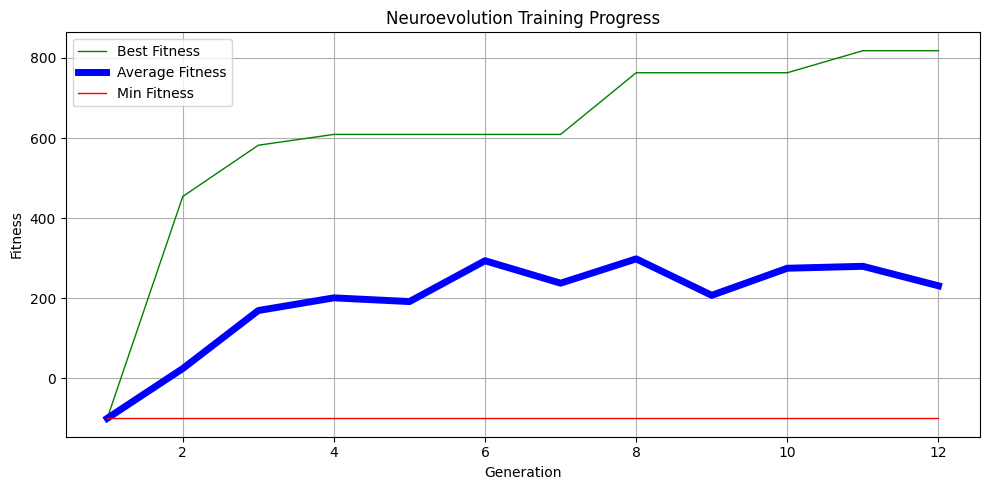

Generation: 12 / 100

Alltime best: 818.00


In [ ]:
import torch
from src.non_reinforcement.neuroevolution.neuroevolution_trainer import NeuroevolutionTrainer
from src.non_reinforcement.neuroevolution.neuroevolution_net import NeuroevolutionNet
from gym_super_mario_bros.actions import COMPLEX_MOVEMENT, SIMPLE_MOVEMENT, RIGHT_ONLY

DEVICE = "cpu"  #torch.device("cuda" if torch.cuda.is_available() else "cpu")

cnn_config = [
    {"out_channels": 16, "kernel_size": 8, "stride": 4},
    {"out_channels": 32, "kernel_size": 4, "stride": 2},
]

mlp_config = [
    32 * 9 * 9,  # Must match flattened output of CNN
    256,
    128,
    len(RIGHT_ONLY)
]

model = NeuroevolutionNet(
    input_channels=1,
    num_actions=len(RIGHT_ONLY),
    cnn_config=cnn_config,
    mlp_config=mlp_config
)

trainer = NeuroevolutionTrainer(
    base_model=model,
    env_name='SuperMarioBros-v0',
    action_set=RIGHT_ONLY,
    device=DEVICE,
    video_dir="../media/videos",
    generations=100,
    population_size=20,
    max_steps_per_episode=2000,
    mutation_rate_range=(0.1, 0.5),
    mutation_strength_range=(0.01, 0.2),
    roulette_wheel_selection_temperature=0.5,
    elitism=2
)

trainer.run()
trainer.record_best_agent()